In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis
import numpy as np
from IPython.display import display

MISSING_ANGLE_VALUE = -9999

data = pd.read_csv("../data/gait.csv")  
print(data.head())  

columns_to_replace_with_empty = ['subject', 'condition', 'replication', 'leg', 'joint', 'time']
data[columns_to_replace_with_empty] = data[columns_to_replace_with_empty].fillna('empty')
data['angle'] = data['angle'].fillna(MISSING_ANGLE_VALUE)

data['subject'] = data['subject'].apply(lambda x: x if x in range(0, 11) else 'empty')
data['condition'] = data['condition'].apply(lambda x: x if x in [1, 2, 3] else 'empty')
data['replication'] = data['replication'].apply(lambda x: x if x in range(1, 11) else 'empty')
data['leg'] = data['leg'].apply(lambda x: x if x in [1, 2] else 'empty')
data['joint'] = data['joint'].apply(lambda x: x if x in [1, 2, 3] else 'empty')
data['time'] = data['time'].apply(lambda x: x if x is not None and 0 <= x <= 100 else 'empty')
data['angle'] = data['angle'].apply(lambda x: x if -90 <= x <= 90 else MISSING_ANGLE_VALUE)

   subject  condition  replication  leg  joint  time     angle
0        1          1            1    1      1     0  4.682881
1        1          1            1    1      1     1  5.073127
2        1          1            1    1      1     2  5.229774
3        1          1            1    1      1     3  5.083273
4        1          1            1    1      1     4  4.652399


Distribucija frekvencije u grafu za kategoricke varijable

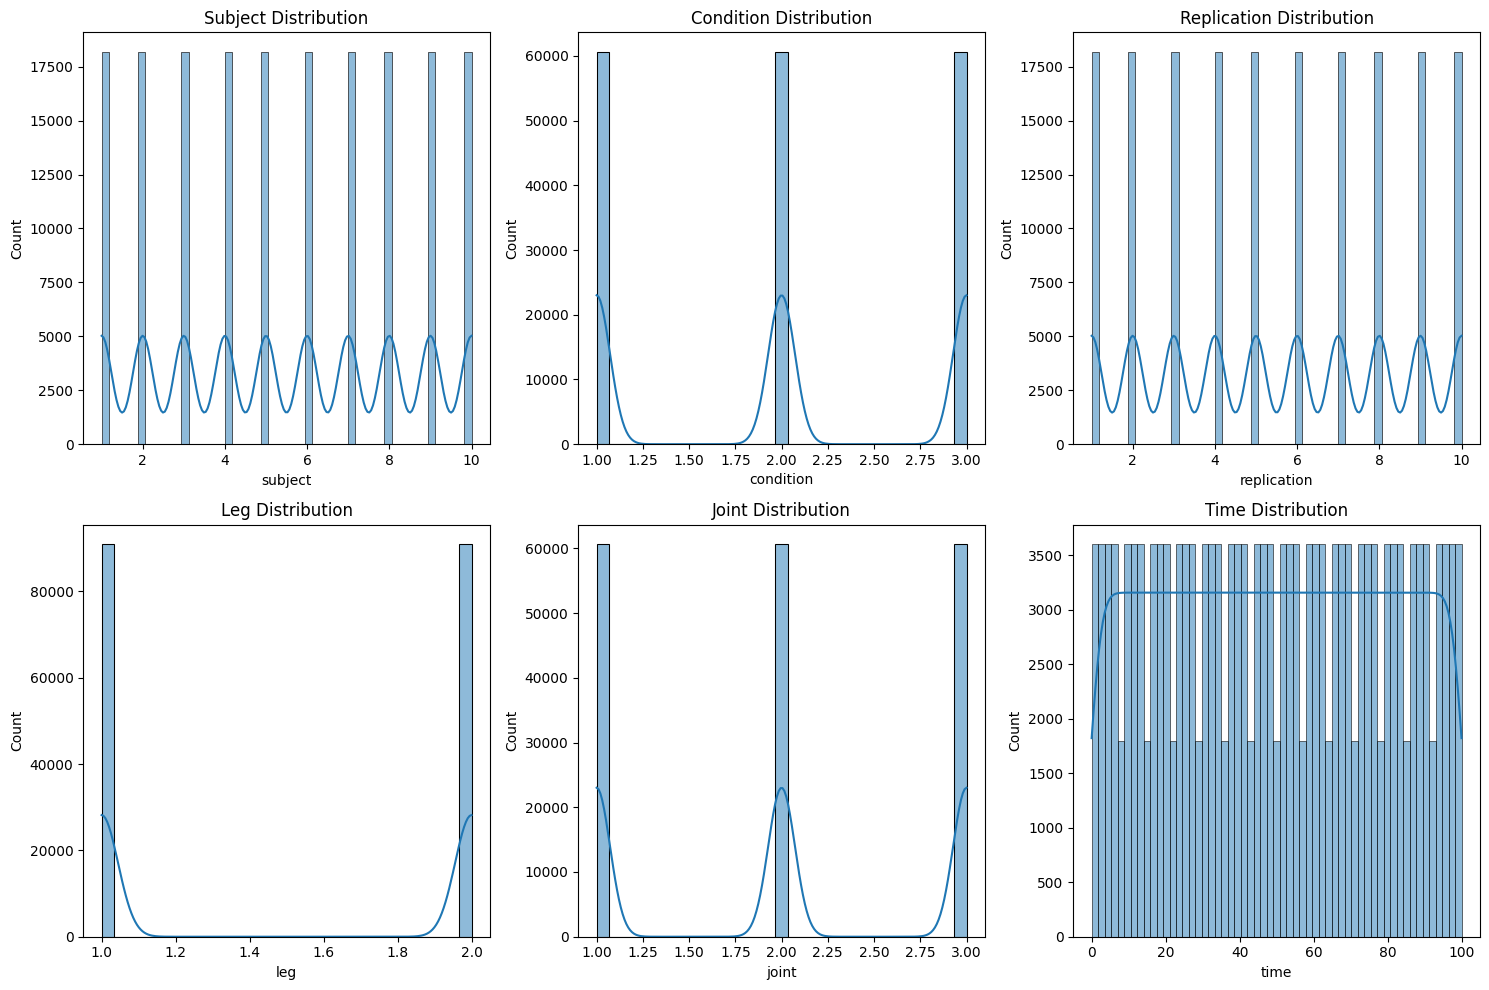

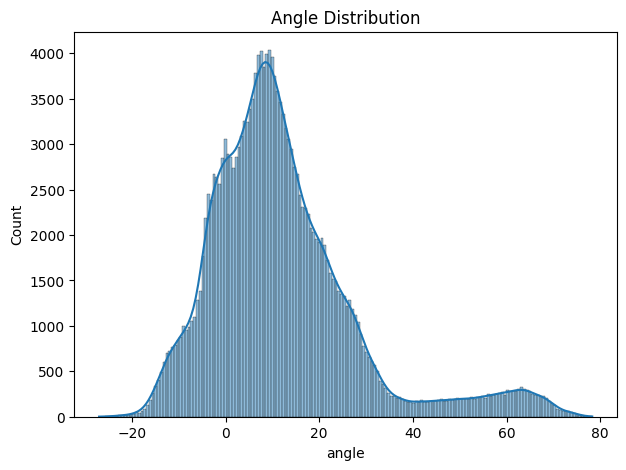

In [3]:

plt.figure(figsize=(15, 10))

# subject
plt.subplot(2, 3, 1)
sns.histplot(data['subject'], kde=True)
plt.title('Subject Distribution')

# condition
plt.subplot(2, 3, 2)
sns.histplot(data['condition'], kde=True)
plt.title('Condition Distribution')

# replication
plt.subplot(2, 3, 3)
sns.histplot(data['replication'], kde=True)
plt.title('Replication Distribution')

# leg
plt.subplot(2, 3, 4)
sns.histplot(data['leg'], kde=True)
plt.title('Leg Distribution')

# joint
plt.subplot(2, 3, 5)
sns.histplot(data['joint'], kde=True)
plt.title('Joint Distribution')

# time
plt.subplot(2, 3, 6)
sns.histplot(data['time'], kde=True)
plt.title('Time Distribution')

plt.tight_layout()
plt.show()


# angle
plt.figure(figsize=(7, 5))
sns.histplot(data['angle'], kde=True)
plt.title('Angle Distribution')
plt.show()

Statistika kontinuirane varijable

Pokretnost gleznja (ankle), condition == 1

Ocekivano ponasanje je da steznik gleznja ogranicava pokretnost gleznja, odnosno smanjuje raspon (kut) koje glezanj moze postici. Steznik koljena nema veliki utjecaj na pokretnost gleznja.

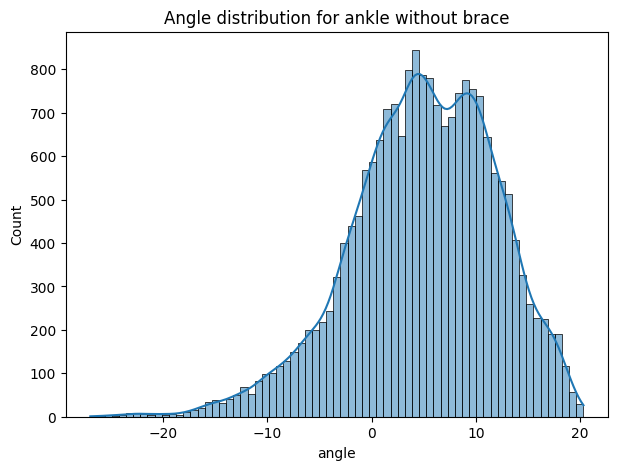

Mean (srednja vrijednost): 4.942350663326739
Skewness (nagnutost distribucije): -0.5125473993867707
Kurtosis (zaobljenost distribucije): 0.4090381665593483


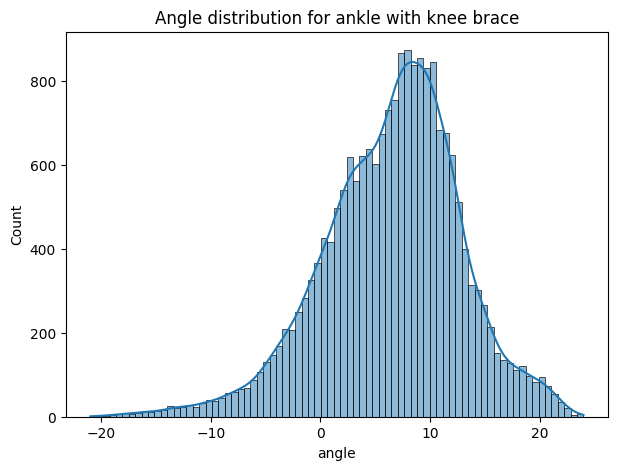

Mean (srednja vrijednost): 6.508984117614511
Skewness (nagnutost distribucije): -0.446860183307615
Kurtosis (zaobljenost distribucije): 0.6968525149431142


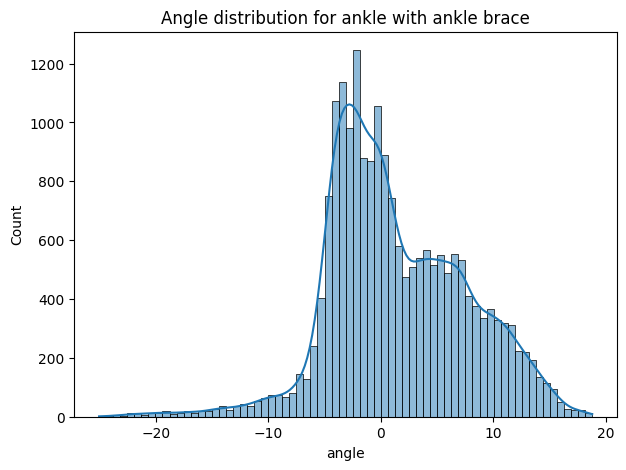

Mean (srednja vrijednost): 1.3838326816191944
Skewness (nagnutost distribucije): 0.06897327848909177
Kurtosis (zaobljenost distribucije): 0.39330908595132374


In [4]:
# unbraced (condition == 1) and ankle joint angle (joint == 1)
group_data = data[(data['condition'] == 1) & (data['joint'] == 1)]
mean = group_data['angle'].mean()
skewness = skew(group_data['angle'])
kurt = kurtosis(group_data['angle'])

plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 1) & (data['joint'] == 1)]['angle'], kde=True)
plt.title('Angle distribution for ankle without brace')
plt.show()
print(f"Mean (srednja vrijednost): {mean}")
print(f"Skewness (nagnutost distribucije): {skewness}")
print(f"Kurtosis (zaobljenost distribucije): {kurt}")

# knee brace (condition == 2) and ankle joint angle (joint == 1)
group_data = data[(data['condition'] == 2) & (data['joint'] == 1)]
mean = group_data['angle'].mean()
skewness = skew(group_data['angle'])
kurt = kurtosis(group_data['angle'])
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 2)  & (data['joint'] == 1)]['angle'], kde=True)
plt.title('Angle distribution for ankle with knee brace')
plt.show()
print(f"Mean (srednja vrijednost): {mean}")
print(f"Skewness (nagnutost distribucije): {skewness}")
print(f"Kurtosis (zaobljenost distribucije): {kurt}")


#  ankle brace (condition == 3) and ankle joint angle (joint == 1)
group_data = data[(data['condition'] == 3) & (data['joint'] == 1)]
mean = group_data['angle'].mean()
skewness = skew(group_data['angle'])
kurt = kurtosis(group_data['angle'])
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 3)  & (data['joint'] == 1)]['angle'], kde=True)
plt.title('Angle distribution for ankle with ankle brace')
plt.show()
print(f"Mean (srednja vrijednost): {mean}")
print(f"Skewness (nagnutost distribucije): {skewness}")
print(f"Kurtosis (zaobljenost distribucije): {kurt}")


Pokretnost koljena (knee), condition == 2

Ocekivano ponasanje je da steznik koljena ogranicava pokretnost koljena, odnosno smanjuje raspon kuta (angle) koje koljeno moze postici. Steznik gleznja nema veliki utjecaj na pokretnost koljena.

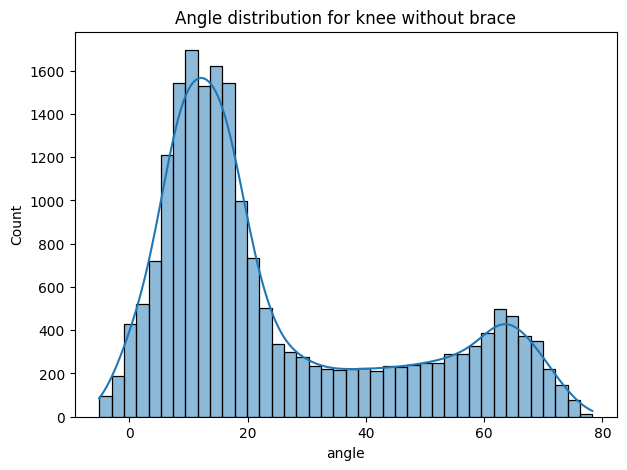

Mean (srednja vrijednost): 25.048152648863297
Skewness (nagnutost distribucije): 0.9398679128094877
Kurtosis (zaobljenost distribucije): -0.4598495428659666


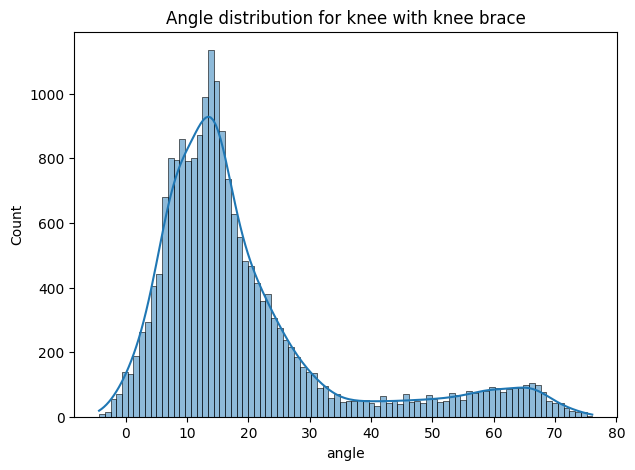

Mean (srednja vrijednost): 19.38469646595439
Skewness (nagnutost distribucije): 1.7093915872526524
Kurtosis (zaobljenost distribucije): 2.3588346072003255


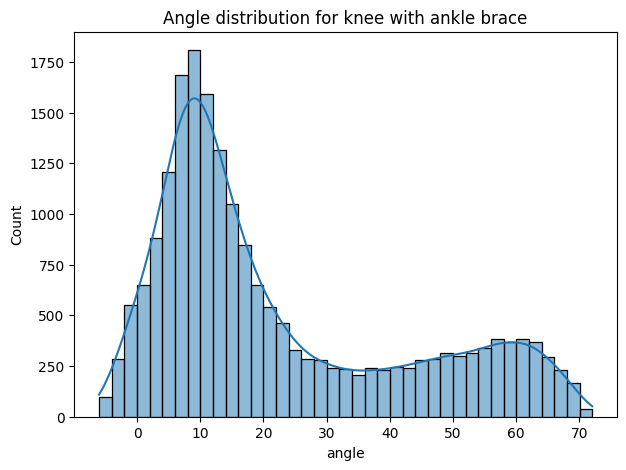

Mean (srednja vrijednost): 22.26055171267016
Skewness (nagnutost distribucije): 0.9167547698161528
Kurtosis (zaobljenost distribucije): -0.46394577717639995


In [5]:
# unbraced (condition == 1) and knee joint angle (joint == 2)
group_data = data[(data['condition'] == 1) & (data['joint'] == 2)]
mean = group_data['angle'].mean()
skewness = skew(group_data['angle'])
kurt = kurtosis(group_data['angle'])
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 1)  & (data['joint'] == 2)]['angle'], kde=True)
plt.title('Angle distribution for knee without brace')
plt.show()
print(f"Mean (srednja vrijednost): {mean}")
print(f"Skewness (nagnutost distribucije): {skewness}")
print(f"Kurtosis (zaobljenost distribucije): {kurt}")

# knee brace (condition == 2) and knee joint angle (joint == 2)
group_data = data[(data['condition'] == 2) & (data['joint'] == 2)]
mean = group_data['angle'].mean()
skewness = skew(group_data['angle'])
kurt = kurtosis(group_data['angle'])
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 2)  & (data['joint'] == 2)]['angle'], kde=True)
plt.title('Angle distribution for knee with knee brace')
plt.show()
print(f"Mean (srednja vrijednost): {mean}")
print(f"Skewness (nagnutost distribucije): {skewness}")
print(f"Kurtosis (zaobljenost distribucije): {kurt}")

#  ankle brace (condition == 3) and knee joint angle (joint == 2)
group_data = data[(data['condition'] == 3) & (data['joint'] == 2)]
mean = group_data['angle'].mean()
skewness = skew(group_data['angle'])
kurt = kurtosis(group_data['angle'])
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 3)  & (data['joint'] == 2)]['angle'], kde=True)
plt.title('Angle distribution for knee with ankle brace')
plt.show()
print(f"Mean (srednja vrijednost): {mean}")
print(f"Skewness (nagnutost distribucije): {skewness}")
print(f"Kurtosis (zaobljenost distribucije): {kurt}")

Pokretnost kuka (hip), condition == 3

Ocekivano ponasanje je da steznik koljena i steznik gleznja znacajno ne utjecu na pokretnost kuka.

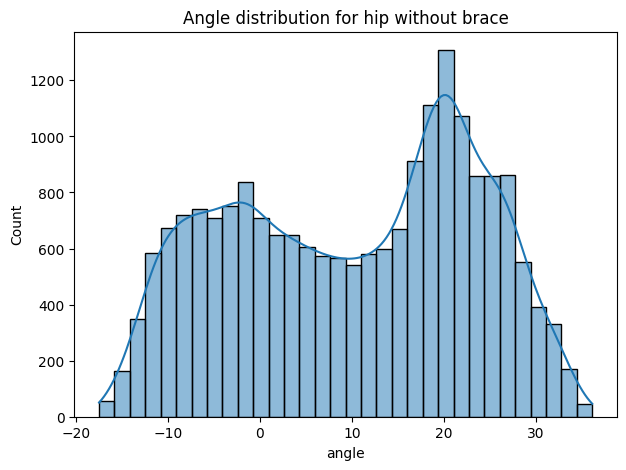

Mean (srednja vrijednost): 10.059110373918193
Skewness (nagnutost distribucije): -0.15487273825617592
Kurtosis (zaobljenost distribucije): -1.2156259045720292


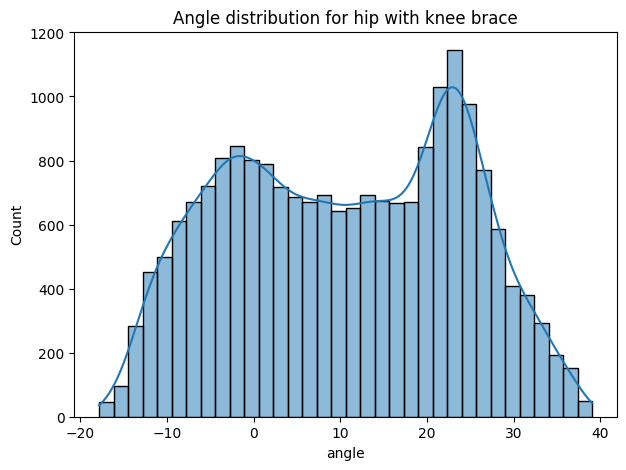

Mean (srednja vrijednost): 10.486392865253867
Skewness (nagnutost distribucije): -0.04228450510582449
Kurtosis (zaobljenost distribucije): -1.1256202180487145


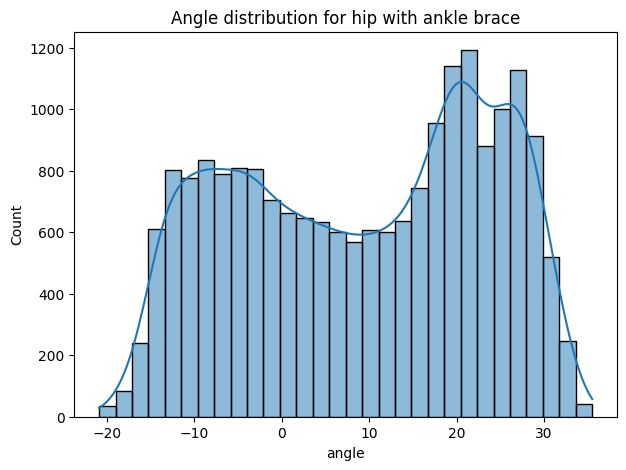

Mean (srednja vrijednost): 9.269816706820727
Skewness (nagnutost distribucije): -0.15701044112981508
Kurtosis (zaobljenost distribucije): -1.293261642112621


In [6]:
# unbraced (condition == 1) and hip joint angle (joint == 3)
group_data = data[(data['condition'] == 1) & (data['joint'] == 3)]
mean = group_data['angle'].mean()
skewness = skew(group_data['angle'])
kurt = kurtosis(group_data['angle'])
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 1)  & (data['joint'] == 3)]['angle'], kde=True)
plt.title('Angle distribution for hip without brace')
plt.show()
print(f"Mean (srednja vrijednost): {mean}")
print(f"Skewness (nagnutost distribucije): {skewness}")
print(f"Kurtosis (zaobljenost distribucije): {kurt}")

# knee brace (condition == 2) and hip joint angle (joint == 3)
group_data = data[(data['condition'] == 2) & (data['joint'] == 3)]
mean = group_data['angle'].mean()
skewness = skew(group_data['angle'])
kurt = kurtosis(group_data['angle'])
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 2)  & (data['joint'] == 3)]['angle'], kde=True)
plt.title('Angle distribution for hip with knee brace')
plt.show()
print(f"Mean (srednja vrijednost): {mean}")
print(f"Skewness (nagnutost distribucije): {skewness}")
print(f"Kurtosis (zaobljenost distribucije): {kurt}")

# ankle brace (condition == 3) and hip joint angle (joint == 3)
group_data = data[(data['condition'] == 3) & (data['joint'] == 3)]
mean = group_data['angle'].mean()
skewness = skew(group_data['angle'])
kurt = kurtosis(group_data['angle'])
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 3)  & (data['joint'] == 3)]['angle'], kde=True)
plt.title('Angle distribution for hip with ankle brace')
plt.show()
print(f"Mean (srednja vrijednost): {mean}")
print(f"Skewness (nagnutost distribucije): {skewness}")
print(f"Kurtosis (zaobljenost distribucije): {kurt}")

Statisticka analiza 'angle' varijable (sve kategorije)

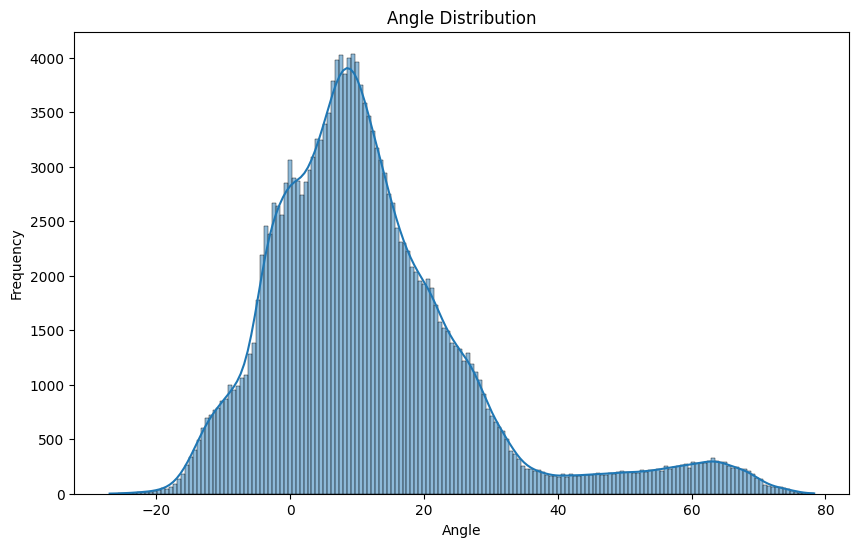

Mean (srednja vrijednost): 12.149320915115677
Skewness (nagnutost distribucije): 1.3795022223153621
Kurtosis (zaobljenost distribucije): 2.5208141911249182


In [ ]:
mean = data['angle'].mean()
skewness = skew(data['angle'])
kurt = kurtosis(data['angle'])

plt.figure(figsize=(10, 6))
sns.histplot(data['angle'], kde=True)
plt.title('Angle Distribution')
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.show()

print(f"Mean (srednja vrijednost): {mean}")
print(f"Skewness (nagnutost distribucije): {skewness}")
print(f"Kurtosis (zaobljenost distribucije): {kurt}")

Korelacije svake varijable sa ciljnom varijablom (angle)

In [23]:
categorical_variables = ['subject', 'condition', 'replication', 'leg', 'joint', 'time']
correlations = data[categorical_variables + ['angle']].corr()['angle'].drop('angle')
print("\nCorrelations with target variable 'angle':")
print(correlations)

std_angle = data['angle'].std()
print(f"Standard Deviation of 'angle': {std_angle}")
mean_angle = data_with_z['angle'].mean()
print(f"Mean of 'angle': {mean_angle}")



Correlations with target variable 'angle':
subject        0.059751
condition     -0.060590
replication    0.004402
leg           -0.072638
joint          0.144187
time           0.220468
Name: angle, dtype: float64
Standard Deviation of 'angle': 16.02582341323219
Mean of 'angle': 12.149320915115677


In [9]:
data_with_z = data.copy()
data_with_z['angle_z'] = zscore(data_with_z['angle'])

data_with_z.head()

,subject,condition,replication,leg,joint,time,angle,z_scores,angle_z
0,1,1,1,1,1,0,4.682881,-0.465902,-0.465902
1,1,1,1,1,1,1,5.073127,-0.441551,-0.441551
2,1,1,1,1,1,2,5.229774,-0.431776,-0.431776
3,1,1,1,1,1,3,5.083273,-0.440918,-0.440918
4,1,1,1,1,1,4,4.652399,-0.467804,-0.467804


Korelacije varijable 'condition' sa ciljnom varijablom 'angle' kada promatramo samo 'joint'

In [10]:
# Calculate the correlation of 'condition' with the target variable 'angle' for joint == 1
# Filter data for joint == 1
filtered_data_joint_1 = data[data['joint'] == 1]
correlation_condition_angle_joint_1 = filtered_data_joint_1[['condition', 'angle']].corr().loc['condition', 'angle']
print(f"Correlation of 'condition' with 'joint' (ankle - glezanj) angle: {correlation_condition_angle_joint_1}")

# Filter data for joint == 2
filtered_data_joint_2 = data[data['joint'] == 2]
correlation_condition_angle_joint_2 = filtered_data_joint_2[['condition', 'angle']].corr().loc['condition', 'angle']
print(f"Correlation of 'condition' with 'joint' (knee - koljeno) angle:  {correlation_condition_angle_joint_2}")

# Filter data for joint == 3
filtered_data_joint_3 = data[data['joint'] == 3]
correlation_condition_angle_joint_3 = filtered_data_joint_3[['condition', 'angle']].corr().loc['condition', 'angle']
print(f"Correlation of 'condition' with 'joint' (hip - kuk) angle: {correlation_condition_angle_joint_3}")

Correlation of 'condition' with 'joint' (ankle - glezanj) angle: -0.21266649323815284
Correlation of 'condition' with 'joint' (knee - koljeno) angle:  -0.059291955969375525
Correlation of 'condition' with 'joint' (hip - kuk) angle: -0.023568004090973968


WoE izracuni

Izracun kada je ciljana varijabla 'angle' nemodificirana


Information Value (IV) for each variable:


/home/prumiha/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable,IV
4,joint,inf
5,time,inf
0,subject,0.208835
3,leg,0.062314
1,condition,0.017499
2,replication,0.000741


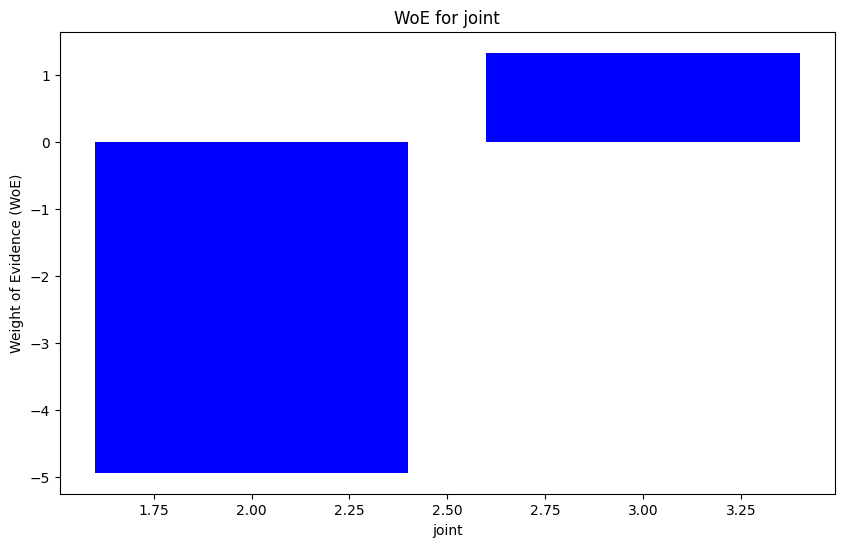

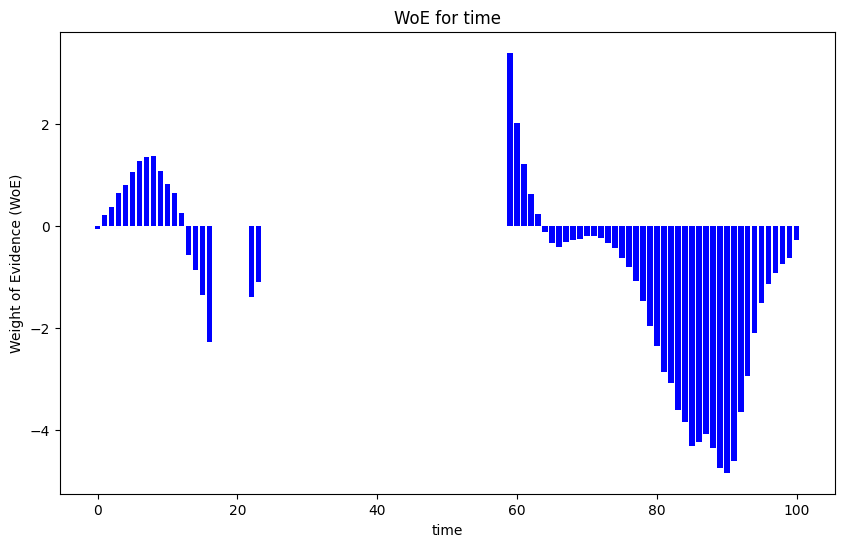

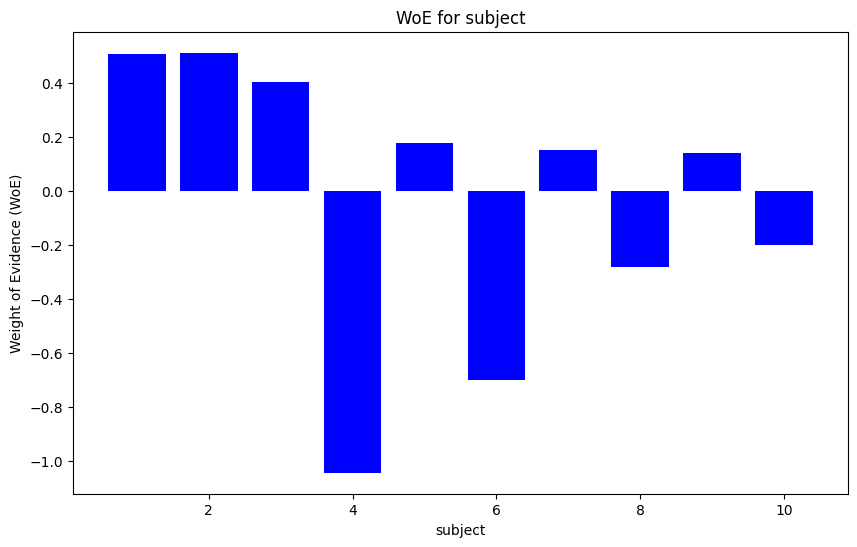

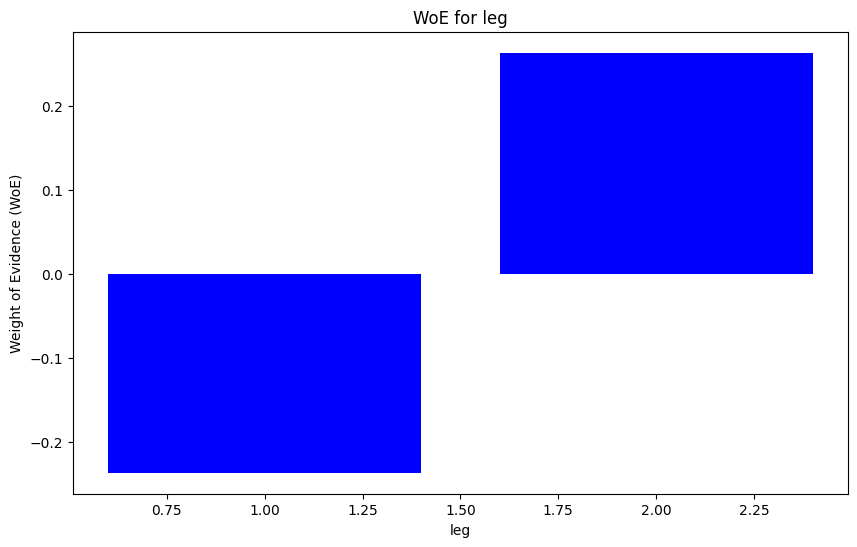

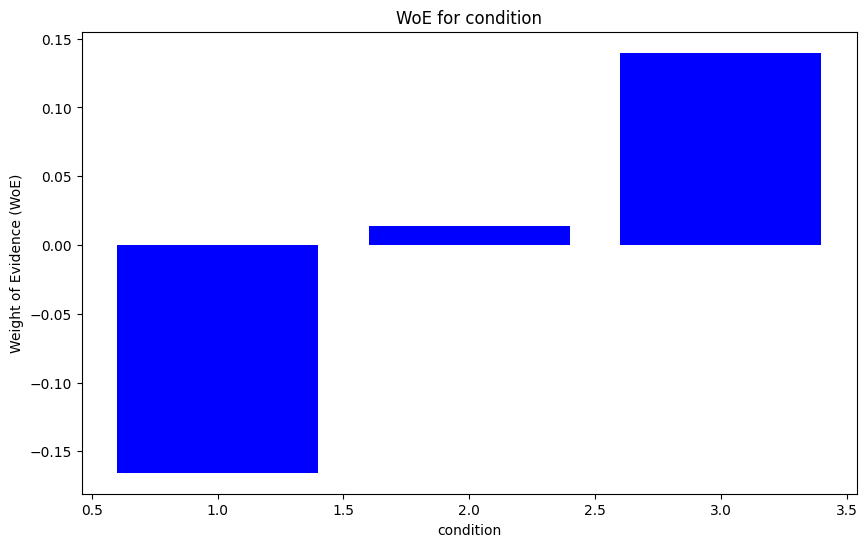


Grouped WoE for the strongest variables:


,Variable,WoE,Values
0,joint,-4.939036,[2]
1,joint,1.336527,[3]
2,joint,inf,[1]
3,time,-inf,"[17, 18, 19, 20, 21]"
4,time,-4.836282,[90]
...,...,...,...
77,leg,-0.237261,[1]
78,leg,0.264008,[2]
79,condition,-0.165560,[1]
80,condition,0.013515,[2]


In [ ]:
target_variable = 'angle'
categorical_variables = ['subject', 'condition', 'replication', 'leg', 'joint', 'time']

data_woe_iv = data.copy()

data_woe_iv['angle_binned'] = pd.qcut(data_woe_iv[target_variable], q=10, duplicates='drop')

woe_iv_dict = {}
iv_values = []

for var in categorical_variables:
    lst = []
    for val in data_woe_iv[var].unique():
        all_count = data_woe_iv[data_woe_iv[var] == val].count()[var]
        good_count = data_woe_iv[(data_woe_iv[var] == val) & (data_woe_iv['angle_binned'] == data_woe_iv['angle_binned'].min())].count()[var]
        bad_count = data_woe_iv[(data_woe_iv[var] == val) & (data_woe_iv['angle_binned'] == data_woe_iv['angle_binned'].max())].count()[var]
        lst.append({
            'Value': val,
            'All': all_count,
            'Good': good_count,
            'Bad': bad_count
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    woe_iv_dict[var] = dset
    iv_values.append({'Variable': var, 'IV': iv})

iv_df = pd.DataFrame(iv_values).sort_values(by='IV', ascending=False)

print("\nInformation Value (IV) for each variable:")
display(iv_df)

strongest_vars = iv_df.head()['Variable'].tolist()

for var in strongest_vars:
    plt.figure(figsize=(10, 6))
    plt.bar(woe_iv_dict[var]['Value'], woe_iv_dict[var]['WoE'], color='blue')
    plt.xlabel(var)
    plt.ylabel('Weight of Evidence (WoE)')
    plt.title(f'WoE for {var}')
    plt.show()

grouped_woe = {}
for var in strongest_vars:
    grouped_woe[var] = woe_iv_dict[var].groupby('WoE')['Value'].apply(list).to_dict()

# Convert grouped_woe to a DataFrame for better display
grouped_woe_df = pd.DataFrame([
    {'Variable': var, 'WoE': woe, 'Values': values}
    for var, woe_dict in grouped_woe.items()
    for woe, values in woe_dict.items()
])

print("\nGrouped WoE for the strongest variables:")
display(grouped_woe_df)

Izracun kada je ciljana varijabla 'angle' modificirana kako bi davala jasne podatke o pokretnosti

Podaci za gelzanj (joint == 1, ankle)


Information Value (IV) for each variable:


,Variable,IV
1,condition,0.734572
0,subject,0.566552
3,leg,0.031977
2,replication,0.001767
4,joint,0.000000


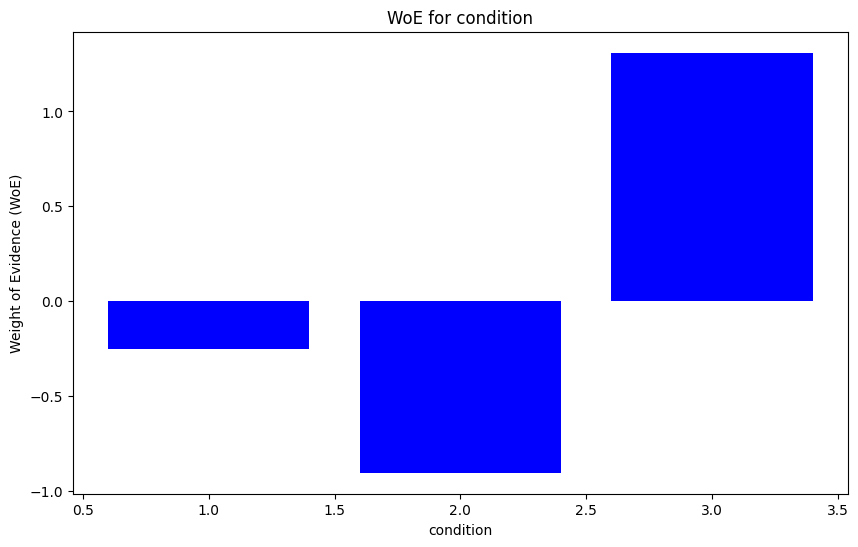

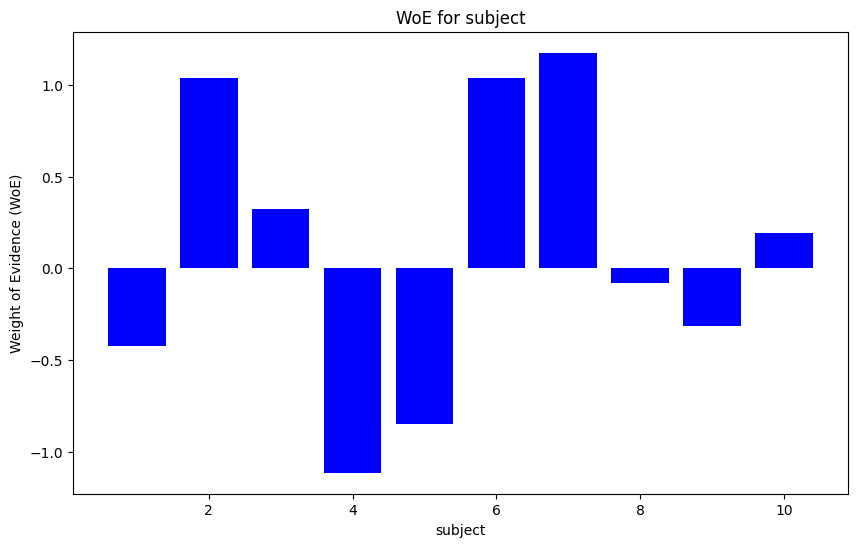

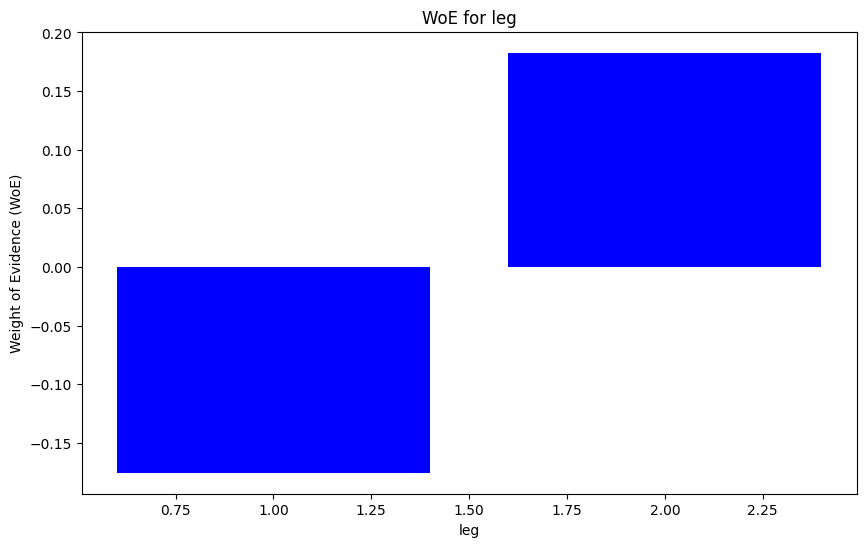

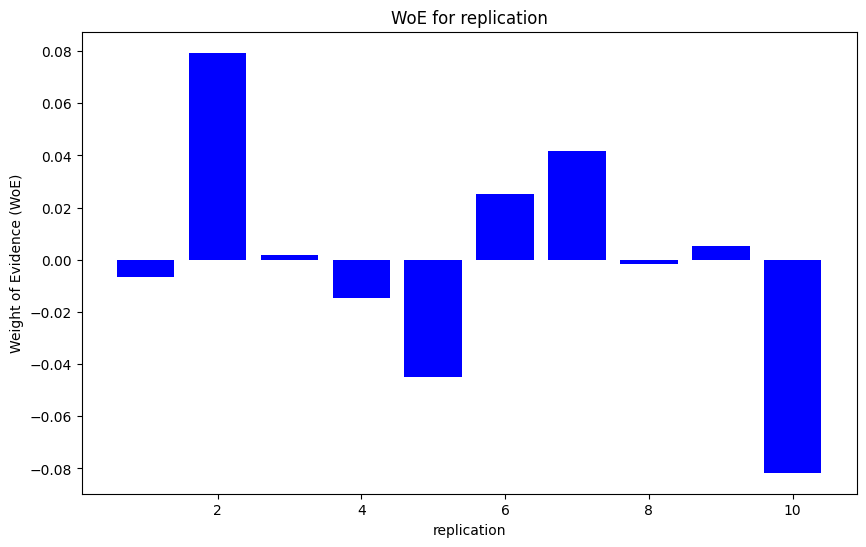


Grouped WoE for the strongest variables:


,Variable,WoE,Values
0,condition,-0.905943,[2]
1,condition,-0.253546,[1]
2,condition,1.309843,[3]
3,subject,-1.114599,[4]
4,subject,-0.850485,[5]
5,subject,-0.421859,[1]
6,subject,-0.312587,[9]
7,subject,-0.079391,[8]
8,subject,0.193371,[10]
9,subject,0.321527,[3]


In [32]:
target_variable = 'angle'
categorical_variables = ['subject', 'condition', 'replication', 'leg', 'joint']

data_woe_iv_ankle = data.copy()

data_woe_iv_ankle = data_woe_iv_ankle[data_woe_iv_ankle['joint'] == 1]
data_woe_iv_ankle = data_woe_iv_ankle.drop(columns=['time'])

data_woe_iv_ankle['angle_binned'] = pd.qcut(data_woe_iv_ankle[target_variable], q=10, duplicates='drop')

woe_iv_dict = {}
iv_values = []

for var in categorical_variables:
    lst = []
    for val in data_woe_iv_ankle[var].unique():
        all_count = data_woe_iv_ankle[data_woe_iv_ankle[var] == val].count()[var]
        good_count = data_woe_iv_ankle[(data_woe_iv_ankle[var] == val) & (data_woe_iv_ankle['angle_binned'] == data_woe_iv_ankle['angle_binned'].min())].count()[var]
        bad_count = data_woe_iv_ankle[(data_woe_iv_ankle[var] == val) & (data_woe_iv_ankle['angle_binned'] == data_woe_iv_ankle['angle_binned'].max())].count()[var]
        lst.append({
            'Value': val,
            'All': all_count,
            'Good': good_count,
            'Bad': bad_count
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    woe_iv_dict[var] = dset
    iv_values.append({'Variable': var, 'IV': iv})

iv_df = pd.DataFrame(iv_values).sort_values(by='IV', ascending=False)

print("\nInformation Value (IV) for each variable:")
display(iv_df)

strongest_vars = iv_df.head()['Variable'].tolist()
strongest_vars.remove('joint')

for var in strongest_vars:
    plt.figure(figsize=(10, 6))
    plt.bar(woe_iv_dict[var]['Value'], woe_iv_dict[var]['WoE'], color='blue')
    plt.xlabel(var)
    plt.ylabel('Weight of Evidence (WoE)')
    plt.title(f'WoE for {var}')
    plt.show()

grouped_woe = {}
for var in strongest_vars:
    grouped_woe[var] = woe_iv_dict[var].groupby('WoE')['Value'].apply(list).to_dict()

grouped_woe_df = pd.DataFrame([
    {'Variable': var, 'WoE': woe, 'Values': values}
    for var, woe_dict in grouped_woe.items()
    for woe, values in woe_dict.items()
])

print("\nGrouped WoE for the strongest variables:")
display(grouped_woe_df)

Podaci za koljeno (joint == 2, knee)


Information Value (IV) for each variable:


/home/prumiha/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable,IV
0,subject,inf
1,condition,0.163512
3,leg,0.144097
2,replication,0.002226
4,joint,0.000000


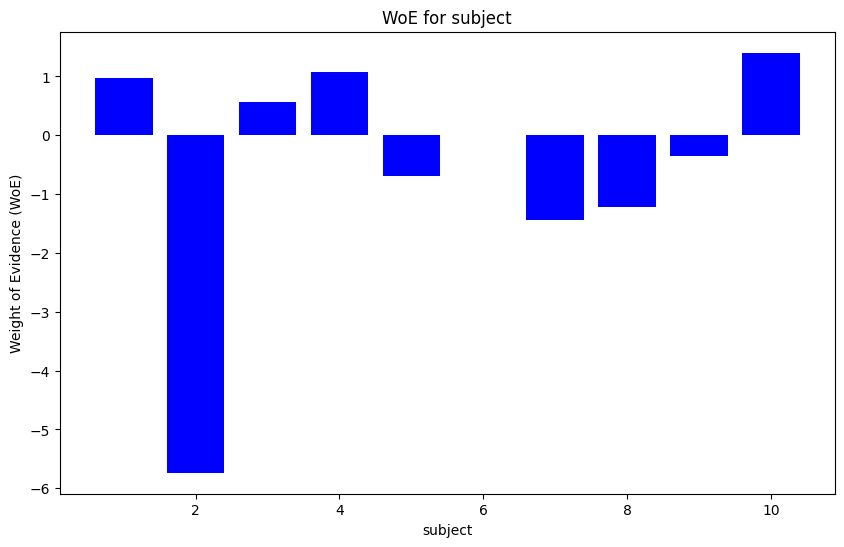

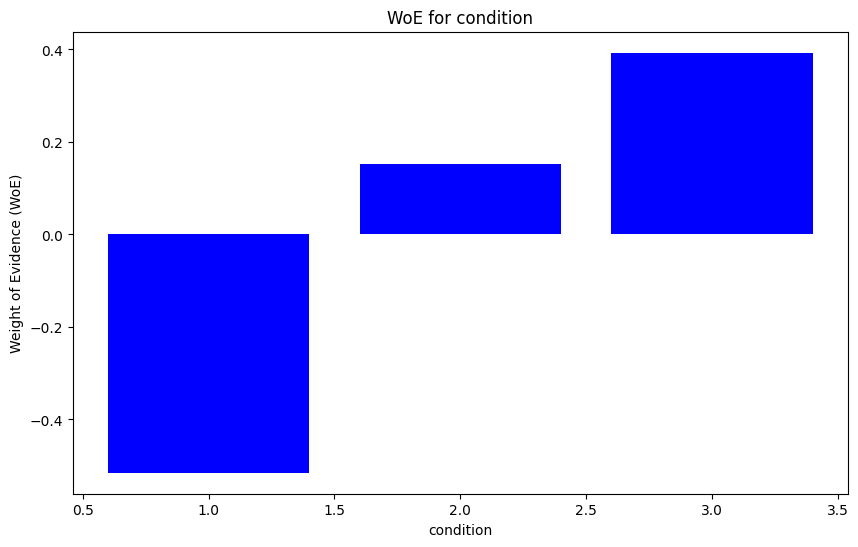

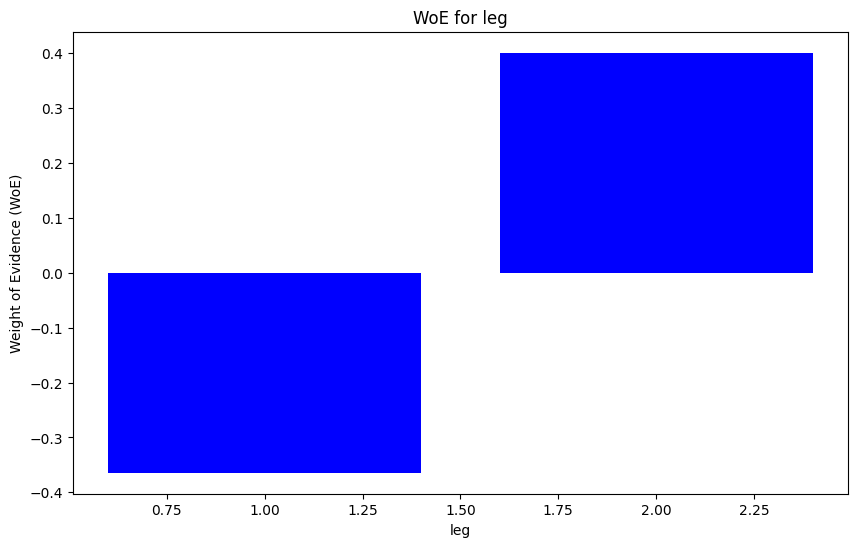

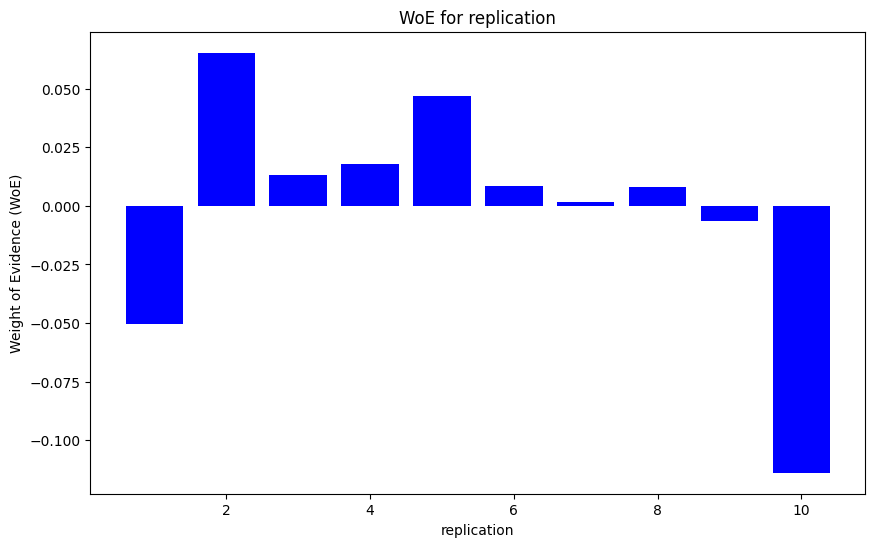


Grouped WoE for the strongest variables:


,Variable,WoE,Values
0,subject,-inf,[6]
1,subject,-5.734958,[2]
2,subject,-1.431940,[7]
3,subject,-1.212880,[8]
4,subject,-0.695861,[5]
5,subject,-0.357388,[9]
6,subject,0.568758,[3]
7,subject,0.974178,[1]
8,subject,1.077510,[4]
9,subject,1.403650,[10]


In [35]:
target_variable = 'angle'
categorical_variables = ['subject', 'condition', 'replication', 'leg', 'joint']

data_woe_iv_knee = data.copy()

data_woe_iv_knee = data_woe_iv_knee[data_woe_iv_knee['joint'] == 2]
data_woe_iv_knee = data_woe_iv_knee.drop(columns=['time'])

data_woe_iv_knee['angle_binned'] = pd.qcut(data_woe_iv_knee[target_variable], q=10, duplicates='drop')

woe_iv_dict = {}
iv_values = []

for var in categorical_variables:
    lst = []
    for val in data_woe_iv_knee[var].unique():
        all_count = data_woe_iv_knee[data_woe_iv_knee[var] == val].count()[var]
        good_count = data_woe_iv_knee[(data_woe_iv_knee[var] == val) & (data_woe_iv_knee['angle_binned'] == data_woe_iv_knee['angle_binned'].min())].count()[var]
        bad_count = data_woe_iv_knee[(data_woe_iv_knee[var] == val) & (data_woe_iv_knee['angle_binned'] == data_woe_iv_knee['angle_binned'].max())].count()[var]
        lst.append({
            'Value': val,
            'All': all_count,
            'Good': good_count,
            'Bad': bad_count
        })
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    woe_iv_dict[var] = dset
    iv_values.append({'Variable': var, 'IV': iv})

iv_df = pd.DataFrame(iv_values).sort_values(by='IV', ascending=False)

print("\nInformation Value (IV) for each variable:")
display(iv_df)

strongest_vars = iv_df.head()['Variable'].tolist()
strongest_vars.remove('joint')

for var in strongest_vars:
    plt.figure(figsize=(10, 6))
    plt.bar(woe_iv_dict[var]['Value'], woe_iv_dict[var]['WoE'], color='blue')
    plt.xlabel(var)
    plt.ylabel('Weight of Evidence (WoE)')
    plt.title(f'WoE for {var}')
    plt.show()

grouped_woe = {}
for var in strongest_vars:
    grouped_woe[var] = woe_iv_dict[var].groupby('WoE')['Value'].apply(list).to_dict()

grouped_woe_df = pd.DataFrame([
    {'Variable': var, 'WoE': woe, 'Values': values}
    for var, woe_dict in grouped_woe.items()
    for woe, values in woe_dict.items()
])

print("\nGrouped WoE for the strongest variables:")
display(grouped_woe_df)